
# Symbolic computations associated to <i>Independent sets in cographs and increasing subsequences in separable permutations</i>

The aim of this SymPy (python) worksheet is to provide all the computations needed to get the exact and numerical results of Section 4-5 in the paper "Linear-sized independent sets in random cographs and increasing subsequences in separable permutations" by F.Bassino et al.

Notation and definitions are taken from this paper.

### Table of contents

- [Sec.4: Independent sets in cographs](#cographs)
   - [Exact results: parametrization with $y$](#ExactSec5)
   - [Numerical approximations: parametrization with $\beta$](#NumericalSec5)
   - [Taylor expansion of $C_\beta$ when $\beta \to 0$](#Sec5Taylor)
- [Sec.5: increasing sequences in separable permutations](#separable)
   - [Exact results: parametrization with $y$](#ExactSec6)
   - [Numerical approximations: parametrization with $\beta$](#NumericalSec6)
      



In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sp            # package for symbolic computation
from sympy import *
from IPython.display import display # nice displays

from sympy import init_printing
init_printing() 


<a id="cographs"></a>
# Sec.4 Linear-sized independent sets in cographs

Recall the notation of Section 4: for fixed $\beta\in (0,1)$ the random variable $X_{n,\lfloor \beta n\rfloor}$ is the number of independent sets
of size $\lfloor \beta n\rfloor$ in a uniform random labeled cograph of size $n$.

We prove that there exist some computable constants $B_\beta >0$, $C_\beta >0$ such that
\begin{equation}
\mathbb{E}[X_{n,\lfloor \beta n\rfloor}] \sim B_\beta n^{-1/2} (C_\beta)^n.
\end{equation}

We now provide all the necessary code to obtain exact and  numerical approximation of $C_\beta$ with arbitrary precision (and also prove that $C_\beta >1$ for small enough $\beta$).


<a id="ExactSec5"></a>
## Exact results: parametrization with $y$
First it is proved that $\beta$ can be written as $\beta=\Psi(y)$ where
$$
\Psi(y):=\frac{ \left( e^{y}-2 - \log(e^{y}-1) \right) (e^{y}-1)  }
{ 2y + 1 - e^{y} + (e^{y}-1) (2y - 1- \log(e^{y}-1) ) }.
$$
and where we have put 
$$
y=L\left(r(u(\beta) \right)
$$
(see below for the expressions of functions $r,u$).

beta as a function of y:


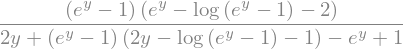

We observe that beta is decreasing:


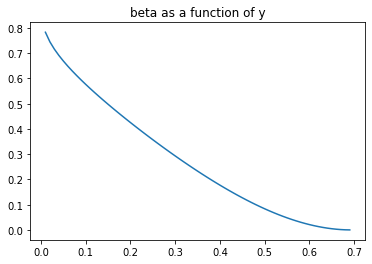

In [7]:
var('y')
def Psi(y):    
    A=(sp.exp(y)-2-sp.log(sp.exp(y)-1))*(sp.exp(y)-1)
    B=2*y+1-sp.exp(y)+(sp.exp(y)-1)*(2*y-1-sp.log(sp.exp(y)-1))
    return A/B

print('beta as a function of y:')
display(Psi(y))

print('We observe that beta is decreasing:')
Y=np.arange(0.01,np.log(2),0.01)
Beeeeeeeta=[Psi(y) for y in Y]
plt.plot(Y,Beeeeeeeta)
plt.title('beta as a function of y')
plt.show()


In Sec.4 of the paper it is then proved that $C_\beta$ can be written as
$$
C_\beta= \frac{2\log(2)-1}{r(u(\beta)) u(\beta)^{\beta}}=  \frac{2\log(2)-1}{G(y)F(y)^{\beta}}
=  \frac{2\log(2)-1}{G(y)F(y)^{\Psi(y)}}
$$
where
\begin{align*}
F(y)&=\frac{e^{y}-2 - \log(e^{y}-1)}{2y + 1 - e^{y}}\\
G(y)&= 2y + 1 - e^{y}.
\end{align*}

C_beta as a function of y:


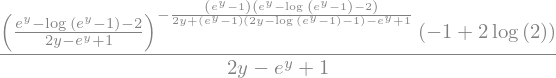

In [8]:
def F(y):
    A=(sp.exp(y)-2-sp.log(sp.exp(y)-1))
    B=2*y+1-sp.exp(y)   
    return A/B

def G(y):
    B=2*y+1-sp.exp(y)  
    return B

def C_beta(y):
    return (2*sp.log(2)-1)/(G(y)*(F(y)**Psi(y)))

print('C_beta as a function of y:')
display(C_beta(y))


Therefore we can plot $C_\beta$ as a function of $y$:

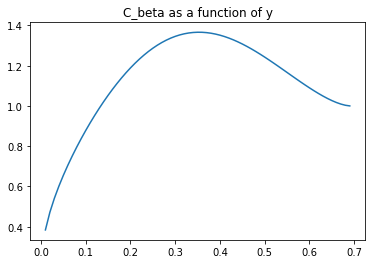

In [11]:
Y=np.arange(0.01,np.log(2),0.01)
C=[C_beta(y) for y in Y]
plt.plot(Y,C)
plt.title('C_beta as a function of y')
plt.show()


<a id="NumericalSec5"></a>
# Numerical approximations: parametrization with $\beta$

First a small function which uses the dichotomy method to compute numerically an implicit function:

In [12]:
def FindImplicit(function,value,x_min,x_max,eps):
    # returns x in (x_min,x_max) such that function(x)=value with precision eps
    if x_max -x_min < eps:
        return (x_max+x_min)/2 
    else:
        z= (x_max+x_min)/2 
        if (function(z)-value)*(function(x_min)-value)<0:
            return FindImplicit(function,value,x_min,z,eps)
        else:       
            return FindImplicit(function,value,z,x_max,eps)

print(FindImplicit(C_beta,value=1,x_min=0.01,x_max=0.6,eps=10**(-8)))


0.13363615326583386


Thus we find that $C_\beta=1$ for $y \approx 0.13363615\dots$.

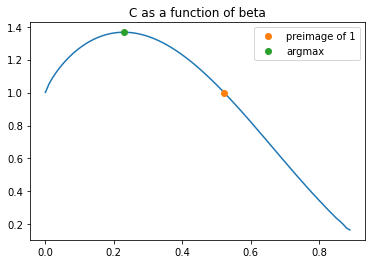

In [19]:

def C(beta):
    eps=0.0001
    y=FindImplicit(Psi,beta,eps**2,np.log(2),eps)
    return C_beta(y)
         
beeeta=np.arange(0.0001,0.9,0.01)
plt.plot(beeeta,[C(b) for b in beeeta])
plt.plot(0.5226,1,'o',label='preimage of 1')
plt.plot(0.22928,1.36630,'o',label='argmax')
plt.title('C as a function of beta')
plt.legend()
plt.show()


We now can give the $\beta_0$ of Theorem 1.3 in the paper. It is the value starting from which $C_\beta <1$ (the orange spot in the above plot). Namely 
$$
\beta_0 = \Psi( C_\beta^{-1}(1) )
$$

Therefore:

In [15]:
print(Psi(FindImplicit(C_beta,1,0.01,0.6,eps=10**(-8))))


0.522677412648179


### Finding numerically the argmax of $C_\beta$

In [16]:
def FindArgmax_aux(function,x_1,x_2,x_3,x_4,eps):
    # returns the argmax of f in (x_1,x_4) with precision eps
    # assuming that f is unimodal (increasing then decreasing)
    if x_4 -x_1 < eps:
        return (x_4+x_1)/2 
    else:
        if function(x_2)<function(x_3):
            return FindArgmax_aux(function,x_2,x_3,(x_3+x_4)/2,x_4,eps)
        else:       
            return FindArgmax_aux(function,x_1,(x_1+x_2)/2,x_2,x_3,eps)

def FindArgmax(function,x_min,x_max,eps):
    # returns the argmax of f in (x_min,x_max) with precision eps
    # assuming that f is unimodal (increasing then decreasing)
    return FindArgmax_aux(function,x_min,(2*x_min+x_max/3),(x_min+2*x_max/3),x_max,eps)
  
def C(beta):
    eps=0.000001
    y=FindImplicit(Psi,beta,eps**2,np.log(2),eps)
    return C_beta(y)
       
print('The argmax of C_beta is: ')        
print(FindArgmax(C,x_min=0.01,x_max=0.6,eps=0.000001))


The argmax of C_beta is: 
0.22928495407104488


<a id='Sec5Taylor'></a>
## Expansion expansion of $C_\beta$ when $\beta \to 0$

Finally we compute the Taylor expansion of $C_\beta$ which is useful in the proof of Theorem 1.3 (ii):

In [9]:

print('Psi(y) near log(2) :')

Expression=Psi(y)
print(Expression.series(y,sp.log(2),n=3))


Psi(y) near log(2) :
2*(y - log(2))**2/(-2 + 4*log(2)) + O((y - log(2))**3, (y, log(2)))


This shows 
\begin{equation}
\beta=\Psi(y)=(y - \log(2))^2/(2\log(2)-1) +\mathcal{O}((y - \log(2))^3).\tag{$45$}
\end{equation}
<!--and thus
$$
y(\beta)=\log(2) -(2\log(2)-1)^{1/2}\beta^{1/2} +\mathcal{O}(\beta),
$$
as claimed in the paper.-->
This allows us to compute the expansions of $u(\beta),r(u(\beta))$:

r \circ u: 


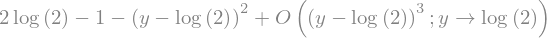

u: 


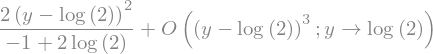

In [45]:
var('y')

def u(y):
    A=(sp.exp(y)-2-sp.log(sp.exp(y)-1))
    B=2*y+1-sp.exp(y)   
    return A/B

def r_circ_u(y):
    B=2*y+1-sp.exp(y)  
    return B

Expression=r_circ_u(y)
print('r \circ u: ')
display(Expression.series(y,sp.log(2),n=3))

print('u: ')
Expression=u(y)
display(Expression.series(y,sp.log(2),n=3))


If we plug finally eq.(45) in the above we get
\begin{align*}
r(u(\beta))&=2\log(2) - 1 - \beta(2\log(2)-1) + \mathcal{O}(\beta^{3/2})\\
u(\beta)&=2\beta+ \mathcal{O}(\beta^{3/2})\\
\end{align*}

This allows us to find that
$$
C_\beta=1+\beta|\log(\beta)| +\mathrm{o}(\beta\log(\beta)).
$$

<a id='separable'></a>
# Sec.5: increasing sequences in separable permutations


In Section 5 we apply the same general strategy to the series $S_+(z,u)$, $S_-(z,u)$ which are solutions of

\begin{align*}
S_-(z,u) &= \frac{S^2}{1-S}+\left(\frac{(S_-(z,u) +z+zu)^2}{1-(S_-(z,u) +z+zu)}+zu+z -S\right)\times \left( \frac{1}{(1-S)^2}-1\right),\\
S_+(z,u) &= \frac{(S_-(z,u) +z+zu)^2}{1-(S_-(z,u) +z+zu)}
\end{align*}

where $S(z)$ is the solution of $S=z+S^2/(1-S)$.

S(z) = 


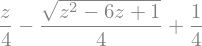

In [10]:
# Of course we can explicitly solve S: 
var('S z')
def Schroder(z):
    return solve(S-z-S**2/(1-S),S)[0]
print('S(z) = ')
display(Schroder(z))

We focus on $S_-$ which is solution of
$$
S_-(z,u) = \frac{S(z)^2}{1-S(z)}+\left(\frac{(S_-(z,u) +z+zu)^2}{1-(S_-(z,u) +z+zu)}+zu+z -S(z)\right)\times \left( \frac{1}{(1-S(z))^2}-1\right)=:G(z,S_-,u)
$$
The associated characteristic system is then:

\begin{align}\label{eq:CharacteristicSystem}
\frac{S(r)^2}{1-S(r)}+\left(\frac{(s +r+ru)^2}{1-(s+r+ru)}+ru+r -S(r)\right)\times \left( \frac{1}{(1-S(r))^2}-1\right)&=s, \tag{$\star 1$}\\
\left( \frac{1}{(1-(s+r+ru))^2}  - 1 \right)\left( \frac{1}{(1-S(r))^2}-1\right)&=1. \tag{$\star 2$} 
\end{align}
We can solve this system seeing $S(r)$ as a parameter:

Solution of the charac. system as functions of S:


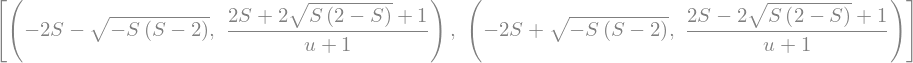

In [11]:
var('s r u S')

A=S**2/(1-S)
B=(s+r+r*u)**2/(1-s-r-r*u)+r*u+r-S
C=1/((1-S)**2)-1
D=1/(1-s-r-r*u)**2-1

print('Solution of the charac. system as functions of S:')
display(solve([A+B*C-s,D*C-1],[s,r]))


Keeping the solution with s>0, we obtain
\begin{align}\label{eq:Simpli_r_u}
r(u)&=  \frac{1}{u + 1} \left(2 y - 2 \sqrt{2y - y^2} + 1\right),\\
s(u)&= -2y+\sqrt{2y - y^2}
\end{align}
where $y:=S(r(u))$.

<a id='ExactSec6'></a>
## Exact results: computing everything as a function of $y$ 

u(y) = 


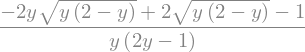

In [13]:
var('y u r')

def u(y):
    Numer_u=2*y-2*sp.sqrt(2*y-y**2)+1
    Denom_u=y-y**2/(1-y)
    u=Numer_u/Denom_u-1
    return (simplify(u))

print('u(y) = ')
display(u(y))


It is easy to check that
$$
y\in (0,1-\tfrac{\sqrt{2}}{2}] \mapsto u(y) \in [0,+\infty),
$$
is a one-to-one mapping.

In [14]:
def s(y):
    return -2*y+sp.sqrt(2*y-y**2)
print('s(y) =')
display(s(y))


s(y) =


r(y) =


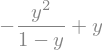

In passing we check: r(u=0) = 3 - 2*sqrt(2) as expected


In [15]:
def r(y):
    return y-y**2/(1-y)
print('r(y) =')
display(r(y))


print('In passing we check: r(u=0) = '+str(simplify((r(1-sp.sqrt(2)/2))))+' as expected')


Recall that $S$ is a solution of $S=z+S^2/(1-S)$. By differentiating this equation we get
$$
S'=1+\frac{S' S(2-S)}{(1-S)^2}
$$
which gives a simple expression of $S'$ as a function of $S$:

S' as a function of S:


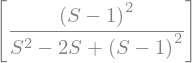

In [16]:
var('Sprime')
print('S\' as a function of S:')
display(solve(Sprime-1-Sprime*S*(2-S)/(1-S)**2,Sprime))


S'(y) =


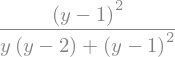

In [17]:
def Sprime(y):
    return (y-1)**2/(y*(y-2)+(y-1)**2)
print('S\'(y) =')
display(Sprime(y))


Using (eq.(2.14) in M.Drmota <i>Asymptotic distributions and a multivariate Darboux method in enumeration problems</i> (1994)) we have that
$$
\beta= \frac{ uG_u(r(u),s(u),u) }{r(u)G_z(r(u),s(u),u)}
$$


We first have
\begin{align*}
G_u\left(r(u),s(u),u \right) &= \frac{r}{(1-r-s-ru)^2}\times \left( \frac{1}{(1-S(r))^2}-1\right)\\
&=r\times \left( \frac{1}{(1-S(r))^2}\right) \qquad \text{(using 2d equation of the charac. system)}.
\end{align*}

We now want to find an expression for $G_z$. 
\begin{multline}
G_z\left(r(u),s(u),u \right)=\frac{SS'(2-S)}{(1-S)^2}+\left(\frac{u+1}{(1-r-s-ru)^2}-S'\right)\times \left( \frac{1}{(1-S(r))^2}-1\right)\\
+\left(\frac{(s +r+ru)^2}{1-(s+r+ru)}+ru+r -S\right)\times \left( \frac{2S'}{(1-S)^3}\right).
\end{multline}

Therefore
\begin{align}
\beta=\frac{ uG_u(r,s,u) }{rG_z(r,s,u)}
&= \frac{u(y)\times r\times \left( \frac{1}{(1-y)^2}\right)}
{ r\times \bigg(\frac{SS'(2-S)}{(1-S)^2}+\left(\frac{u+1}{(1-r-s-ru)^2}-S'\right)\times \left( \frac{2S-S^2}{(1-S)^2}\right) 
 +\left(\frac{(s +r+ru)^2}{1-(s+r+ru)}+ru+r- S\right)\times \left( \frac{2S'}{(1-S)^2(1-S)}\right)\bigg)}\\
&= \frac{u(y)}
{SS'(2-S)+\left(\frac{u+1}{(1-r-s-ru)^2}-S'\right)\times \left( 2S-S^2\right) 
 +\left(\frac{(s +r+ru)^2}{1-(s+r+ru)}+ru+r- S\right)\times \left( \frac{2S'}{1-S}\right)} \qquad (\star) 
\end{align}

Finally if we use
$$
S'=\frac{(S - 1)^2}{S(S-2) + (S - 1)^2}, 
$$
we can deduce from above an "explicit" expression of $\beta$ as a function of $y(\beta)$


We compute the denominator of $(\star)$:

Denominator of beta:


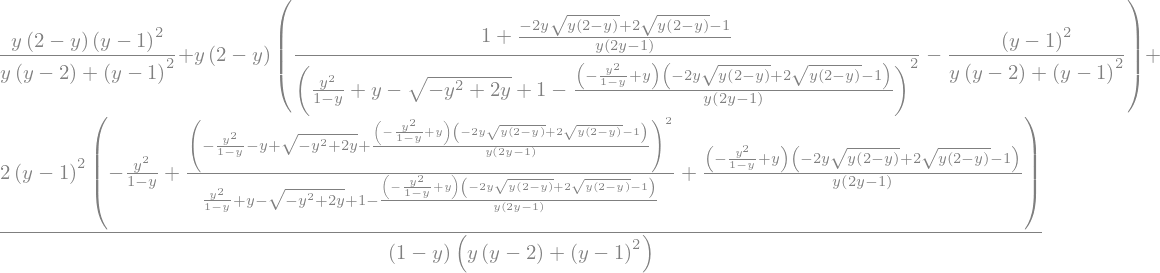

In [18]:

def Denom_beta(y):
    Denom1=y*Sprime(y)*(2-y)
    Denom2=y*(2-y)*((u(y)+1)/((1-r(y)-s(y)-r(y)*u(y))**2)-Sprime(y))
    Denom3=((s(y)+r(y)+r(y)*u(y))**2/(1-s(y)-r(y)-r(y)*u(y))+r(y)*u(y)+r(y)-y)*((2*Sprime(y))/(1-y))
    return Denom1+Denom2+Denom3
print('Denominator of beta:')
display(Denom_beta(y))


In [19]:

def Beta(y):
    return u(y)/(Denom_beta(y))

def E_beta(y):
    ro=3+2*np.sqrt(2)
    return 1/(ro*r(y)*(u(y)**Beta(y)))


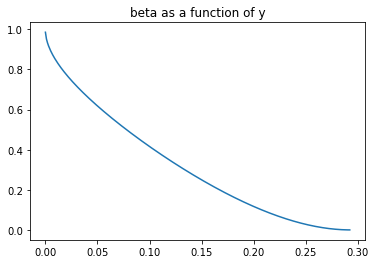

In [20]:
Y=np.arange(0.0001,1-np.sqrt(2)/2,0.001)
CC=[Beta(y) for y in Y]
plt.plot(Y,CC)
plt.title('beta as a function of y')
plt.show()


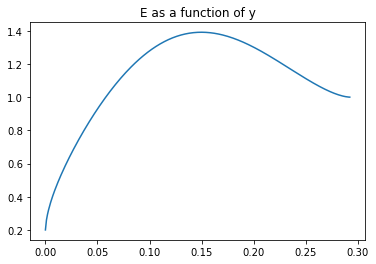

In [21]:
Y=np.arange(0.0001,1-np.sqrt(2)/2,0.001)

EE=[E_beta(y) for y in Y]
plt.plot(Y,EE)
plt.title('E as a function of y')
plt.show()


<a id='NumericalSec6'></a>
##  Numerical approximations: parametrization with $\beta$


In [22]:

def why(beeeta,eps):
    # return y(beta) with precision eps
    return FindImplicit(Beta,beeeta,0.0000001,1-np.sqrt(2)/2-0.000001,eps)

print(why(0.5,0.001))

def EE_beta(b):
    return E_beta(why(b,0.00001))


0.07808559651960206


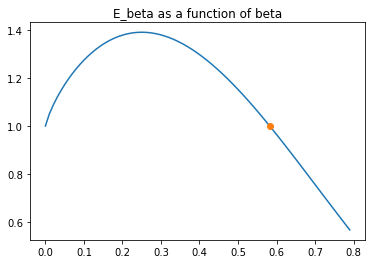

In [23]:
B=np.arange(0.0001,0.8,0.01) #np.arange(0.25028,0.25030,0.000001)
CC=[EE_beta(b) for b in B]


plt.plot(B,CC)
plt.title('E_beta as a function of beta')
plt.plot(0.5827,1,'o')
plt.show()


Finally we compute the value for which $E_\beta=1$ :

In [24]:
FindImplicit(EE_beta,1,0.00001,0.99,0.000001)


# Expansion of $E_\beta$ when $\beta \to 0$

In [25]:
Expr=Beta(y)
print('beta(y) near 1-sqrt(2)/2: ')
print(Expr.series(y,1-sp.sqrt(2)/2,n=3))


beta(y) near 1-sqrt(2)/2: 
-2*(y - 1 + sqrt(2)/2)**2/(2 - 3*sqrt(2)/2) + O((y - 1 + sqrt(2)/2)**3, (y, 1 - sqrt(2)/2))


Hence
$$
\beta(y)=\frac{1}{\tfrac{3}{4} \sqrt{2}-1}(y - 1 + \tfrac{\sqrt{2}}{2})^2 + O(y -1+\tfrac{\sqrt{2}}{2})^3
$$
therefore
$$
y=1-\tfrac{\sqrt{2}}{2}+ \sqrt{\beta}\sqrt{\tfrac{3}{4} \sqrt{2}-1} + \mathrm{o}(\sqrt{\beta}).
$$
We find the same asymptotic for $E_\beta$ as for $C_\beta$:
$$
E_\beta=1+\beta|\log(\beta)| +\mathrm{o}(\beta\log(\beta)).
$$